<a href="https://colab.research.google.com/github/Cristiand056/TelecomX_parte2_Latam/blob/main/TelecomX_parte2_Latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preprocesamiento de los datos

In [326]:
import pandas as pd

In [327]:
datos = pd.read_csv('/content/data.csv')
datos.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
3007,4183-MYFRB,No,Female,0,No,No,21,Yes,No,Fiber optic,...,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,90.05,1862.9
4391,6016-LVTJQ,No,Female,0,Yes,Yes,34,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.65,716.4
5175,7064-FRRSW,No,Male,1,No,No,48,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,Yes,One year,Yes,Electronic check,99.00,4744.35
282,0407-BDJKB,Yes,Male,0,Yes,No,60,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,95.75,5742.9
824,1169-WCVAK,No,Male,0,Yes,No,19,Yes,Yes,Fiber optic,...,Yes,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),88.80,1672.35


In [328]:
datos = datos.drop(columns=['customerID'], axis=1)

In [329]:
datos.sample(5)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
1350,No,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.60,6441.85
258,Yes,Female,0,No,No,3,Yes,No,Fiber optic,No,No,No,Yes,No,Yes,Month-to-month,No,Electronic check,85.80,272.2
6488,No,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),107.70,7919.8
4774,Yes,Male,0,Yes,Yes,9,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.95,248.95
3195,No,Male,1,Yes,No,62,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),89.80,5629.55


In [330]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


<b> Al notar datos faltantes en la variable de respuesta se eliminar estas filas ya que de dar un valor podria influir en el los futuros modelos

In [331]:
datos = datos.replace(' ', float('nan'))

In [332]:
datos = datos.dropna()

In [333]:
X = datos.drop(columns=['Churn'], axis=1)
y = datos['Churn']

In [334]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [335]:
y

,Churn
0,No
1,No
2,Yes
3,Yes
4,Yes
...,...
7262,No
7263,Yes
7264,No
7265,No


##Encoding

###Variables explicativas

In [336]:
variables_categoricas = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity',	'OnlineBackup',	'DeviceProtection',	'TechSupport',	'StreamingTV',	'StreamingMovies', 'Contract',	'PaperlessBilling',	'PaymentMethod']

In [337]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [338]:
columnas = X.columns

In [339]:
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),
                                   variables_categoricas),
                                  remainder='passthrough',
                                  sparse_threshold=0,
                                  force_int_remainder_cols=False)

In [340]:
X = one_hot.fit_transform(X)

In [341]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__gender_Male', 'onehotencoder__Partner_Yes',
       'onehotencoder__Dependents_Yes', 'onehotencoder__PhoneService_Yes',
       'onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No',
       'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes',
       'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes',
       'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__DeviceProtection_Yes',
       'onehotencoder__TechSupport_No',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__TechSupport_Ye

In [342]:
X

array([[0.0, 1.0, 1.0, ..., 9, 65.6, '593.3'],
       [1.0, 0.0, 0.0, ..., 9, 59.9, '542.4'],
       [1.0, 0.0, 0.0, ..., 4, 73.9, '280.85'],
       ...,
       [1.0, 0.0, 0.0, ..., 2, 50.3, '92.75'],
       [1.0, 1.0, 1.0, ..., 67, 67.85, '4627.65'],
       [1.0, 1.0, 1.0, ..., 63, 59.0, '3707.6']], dtype=object)

In [343]:
pd.DataFrame(X, columns=one_hot.get_feature_names_out(columnas))

,onehotencoder__gender_Male,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,...,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__SeniorCitizen,remainder__tenure,remainder__Charges.Monthly,remainder__Charges.Total
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0,9,65.6,593.3
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,9,59.9,542.4
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0,4,73.9,280.85
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1,13,98.0,1237.85
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1,3,83.9,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,13,55.15,742.9
7028,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0,22,85.1,1873.7
7029,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0,2,50.3,92.75
7030,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0,67,67.85,4627.65


###Transformación variable respuesta

In [344]:
from sklearn.preprocessing import LabelEncoder

In [345]:
label_encoder = LabelEncoder()

In [346]:
y = label_encoder.fit_transform(y)

In [347]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [348]:
y_n = pd.DataFrame(y, columns=['Churn'])

In [349]:
datos_procesados = pd.DataFrame(X, columns=one_hot.get_feature_names_out(columnas)).join(y_n).reset_index(drop=True)

In [350]:
datos_procesados

,onehotencoder__gender_Male,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,...,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__SeniorCitizen,remainder__tenure,remainder__Charges.Monthly,remainder__Charges.Total,Churn
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0,9,65.6,593.3,0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0,9,59.9,542.4,0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0,4,73.9,280.85,1
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1,13,98.0,1237.85,1
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1,3,83.9,267.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0,13,55.15,742.9,0
7028,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0,22,85.1,1873.7,1
7029,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0,2,50.3,92.75,0
7030,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0,67,67.85,4627.65,0


In [351]:
datos_procesados.columns = datos_procesados.columns.str.replace('remainder__','')

In [352]:
datos_procesados

,onehotencoder__gender_Male,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,...,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Churn
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0,9,65.6,593.3,0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0,9,59.9,542.4,0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0,4,73.9,280.85,1
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1,13,98.0,1237.85,1
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1,3,83.9,267.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0,13,55.15,742.9,0
7028,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0,22,85.1,1873.7,1
7029,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0,2,50.3,92.75,0
7030,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0,67,67.85,4627.65,0


In [353]:
datos_procesados.to_csv('datos_procesados.csv', index=False)

In [354]:
corr = datos_procesados.corr()
corr['Churn'].sort_values(ascending=False)

,Churn
Churn,1.000000
onehotencoder__Contract_Month-to-month,0.404565
onehotencoder__OnlineSecurity_No,0.342235
onehotencoder__TechSupport_No,0.336877
onehotencoder__InternetService_Fiber optic,0.307463
onehotencoder__PaymentMethod_Electronic check,0.301455
onehotencoder__OnlineBackup_No,0.267595
onehotencoder__DeviceProtection_No,0.252056
Charges.Monthly,0.192858
onehotencoder__PaperlessBilling_Yes,0.191454


### mapa de calor de las corelaciones

In [355]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [356]:
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

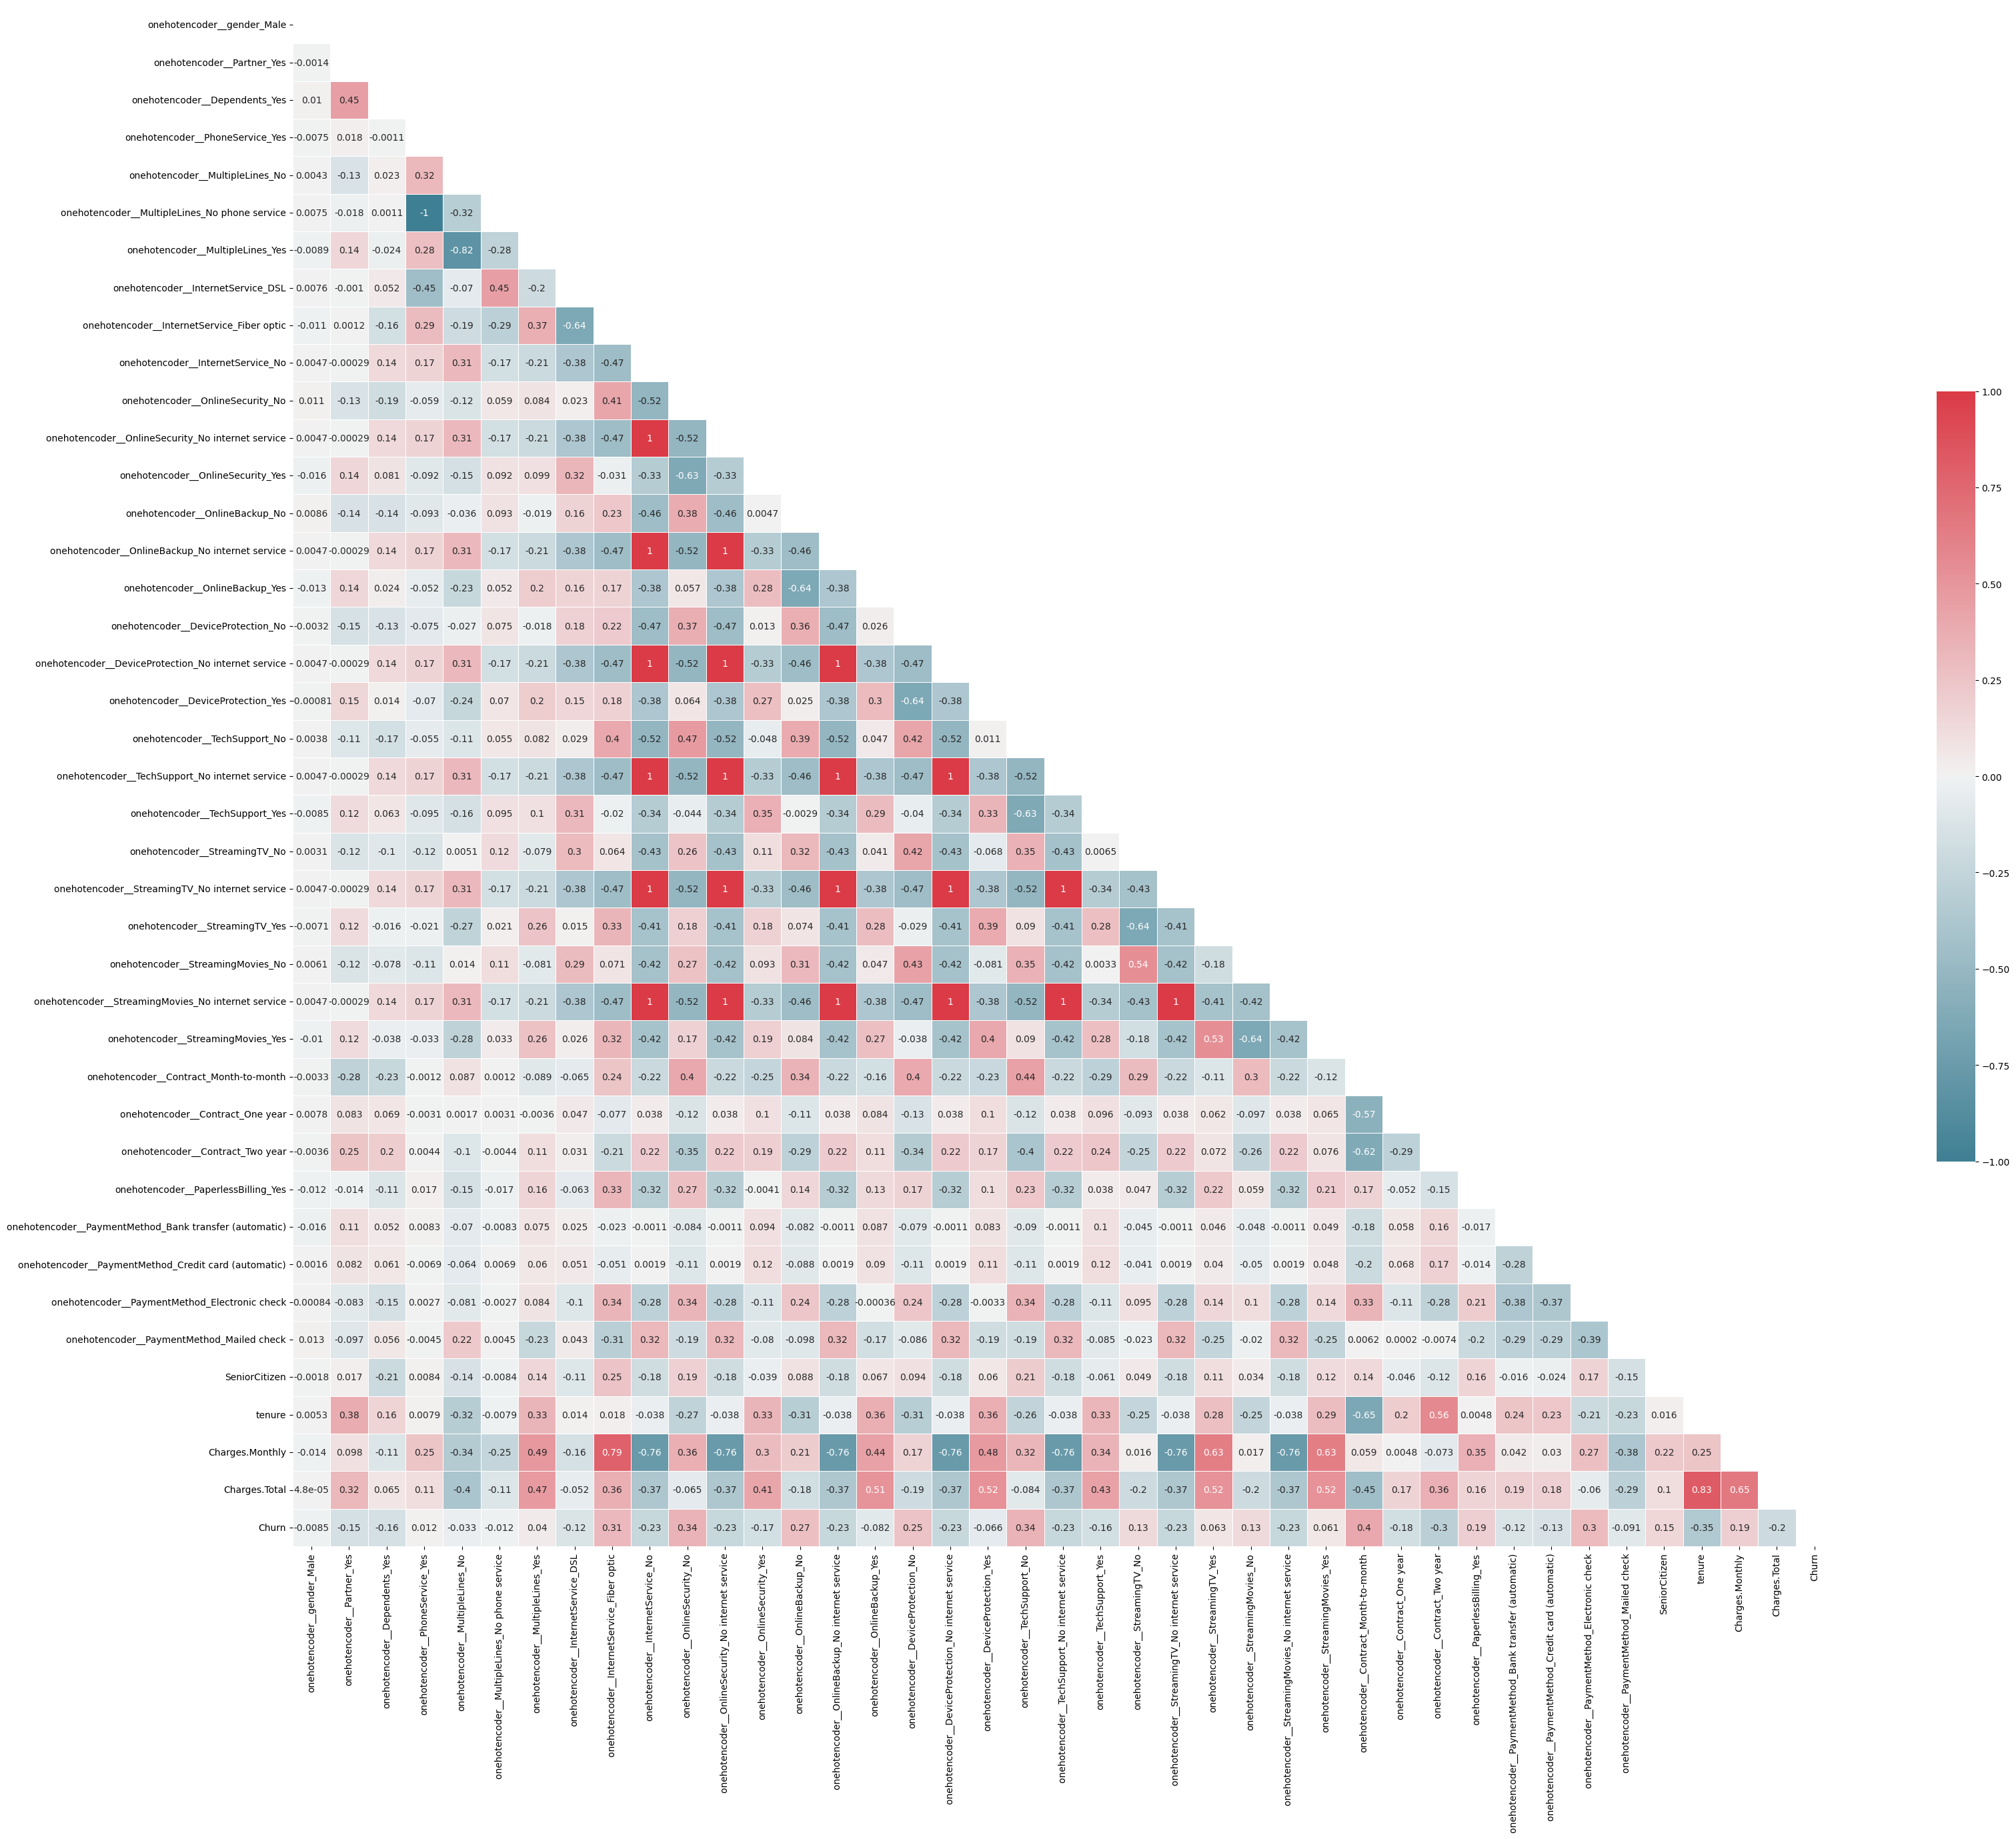

In [357]:
f, ax = plt.subplots(figsize=(40, 30))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

plt.show()

<p>Se encontraron elementos con correralción negativa, pero al ser elegidos modelos no lineales, no se considera su eliminación, sin embargo hay unas caractristicas que se repiten y a futuro solo se deje una por su redundancia, sera análisado más adelante  

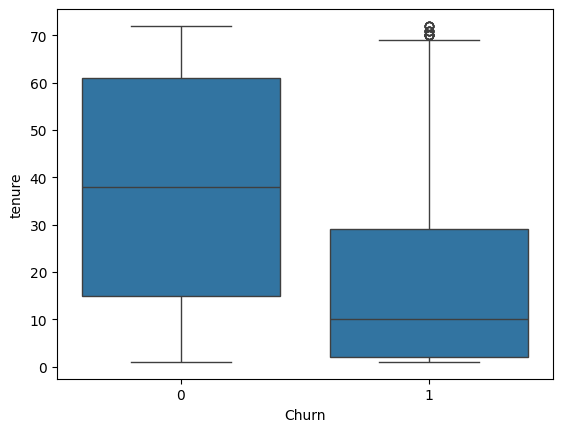

In [358]:
sns.boxplot(data=datos_procesados, x='Churn', y='tenure');

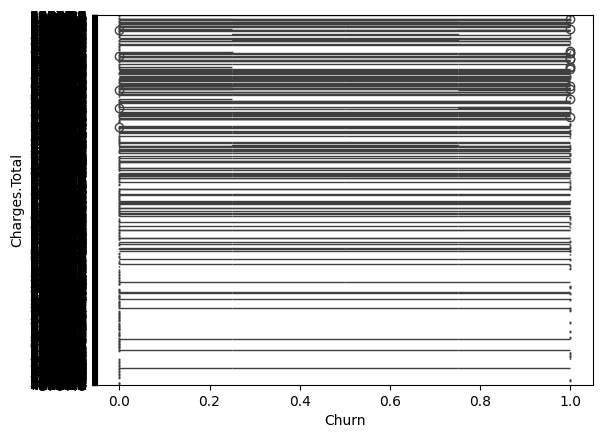

In [359]:
sns.boxplot(data=datos_procesados, x='Churn', y='Charges.Total');

## Verificación de la Proporción de Cancelación (Churn)

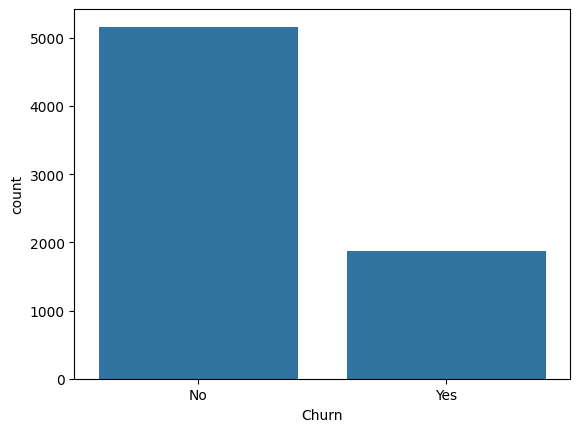

In [360]:
sns.barplot(x=datos['Churn'].value_counts().index, y=datos['Churn'].value_counts())
plt.show()

In [361]:
porcentaje_cancelacion = datos['Churn'].value_counts(normalize=True)
print(f'{round(porcentaje_cancelacion,3)*100}')

Churn
No     73.4
Yes    26.6
Name: proportion, dtype: float64


<b> Se onserva un desvalace entre la clase Churn, por lo tanto los modelos posteriores seran analisados para elegir una posible solucion ya sea oversmapling o undersampling

#Modelado preliminar

##Segmentación de las variables explicativas

In [362]:
from sklearn.model_selection import train_test_split

In [363]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

###Modelo de referencia - baseline

In [364]:
from sklearn.dummy import DummyClassifier

In [365]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

0.7341862117981521

###Modelo de prueba arbol de decisión

In [366]:
from sklearn.tree import DecisionTreeClassifier

In [367]:
modelo_arbol = DecisionTreeClassifier(random_state=42, max_depth=5)
modelo_arbol.fit(X_train, y_train)

modelo_arbol.score(X_test, y_test)

0.7775408670931059

In [368]:
from sklearn.tree import plot_tree

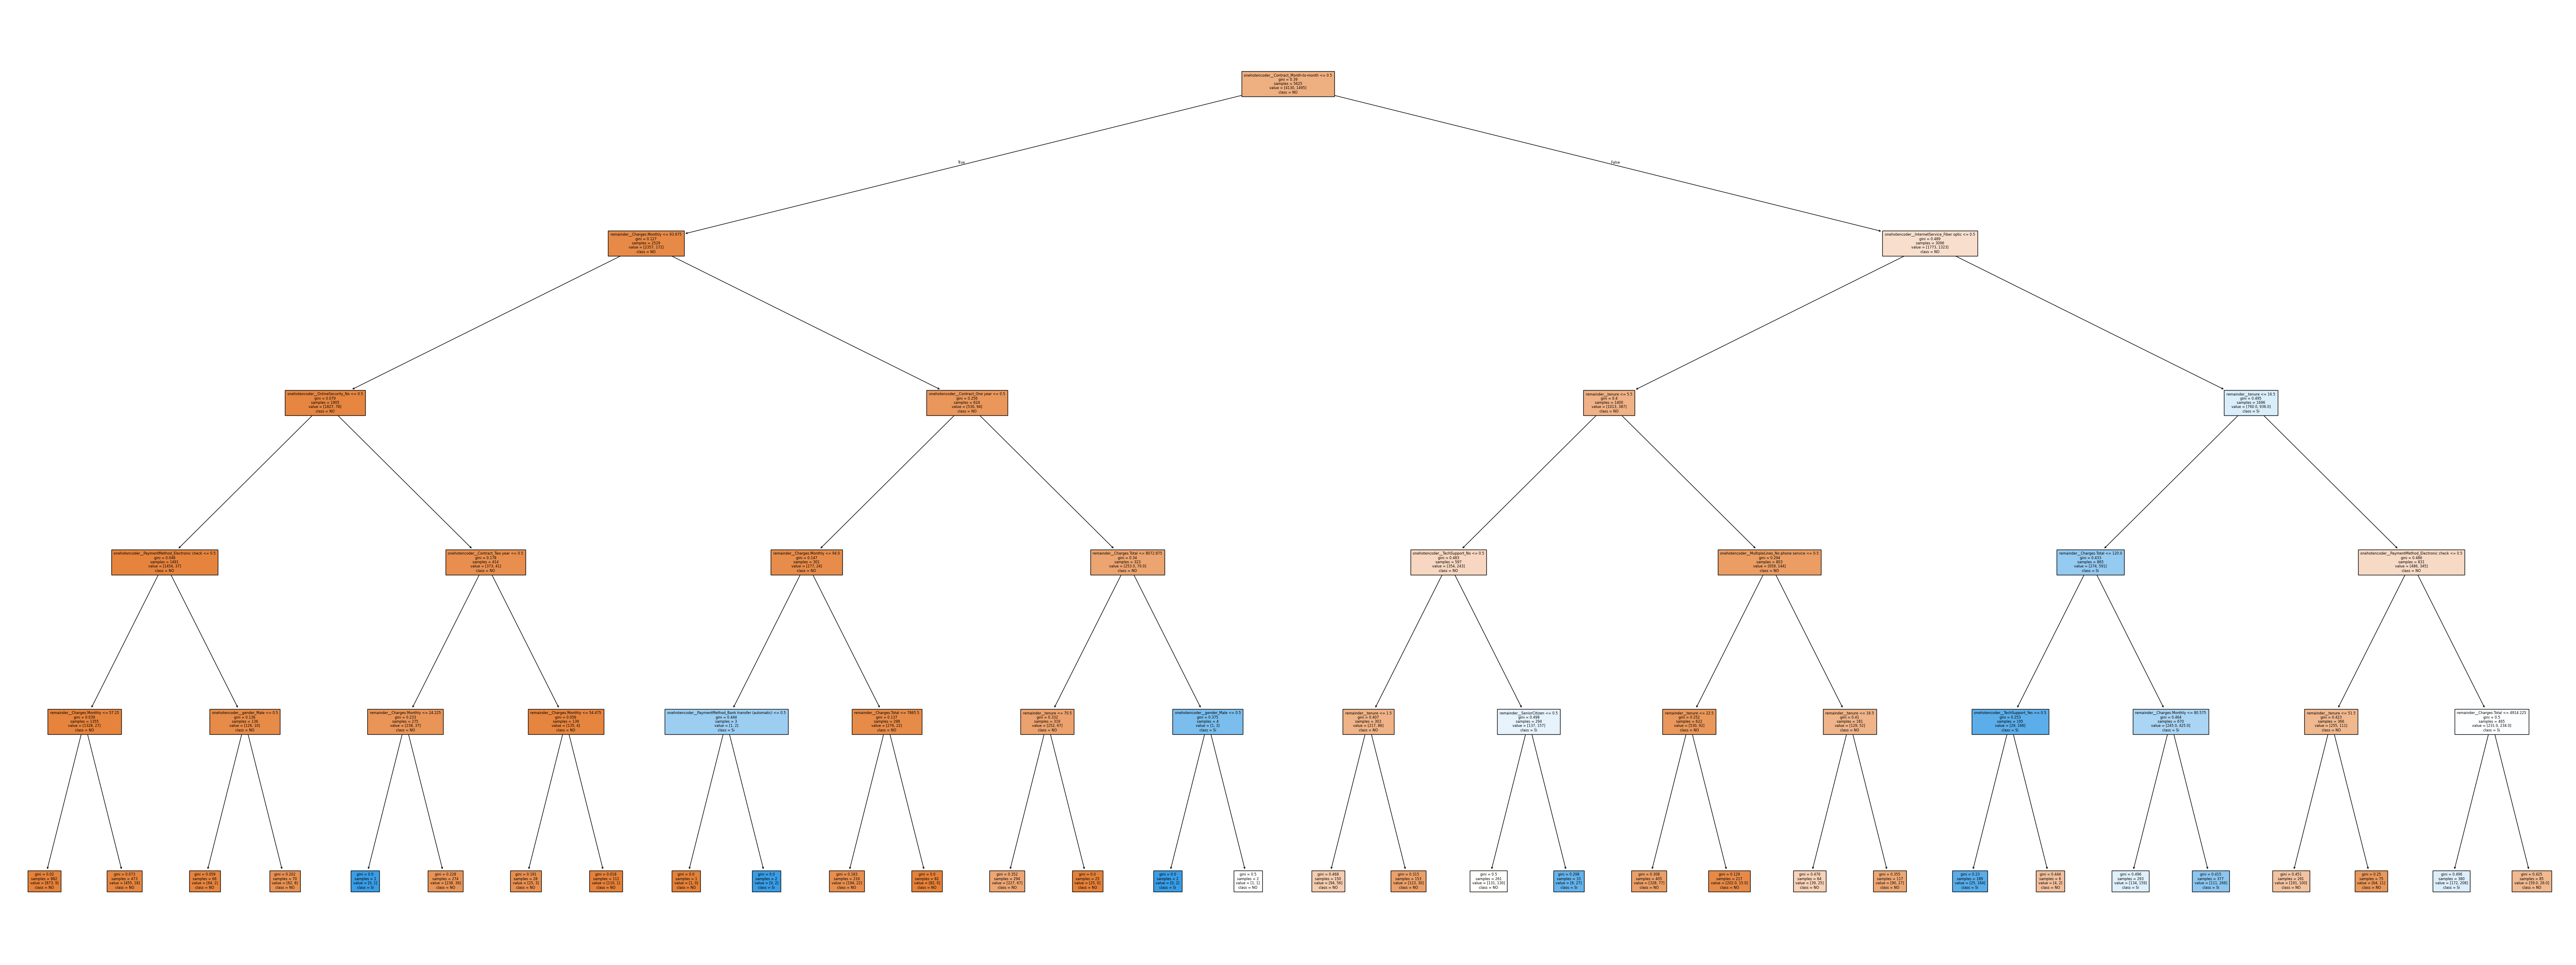

In [369]:
plt.figure(figsize=(80,30))
plot_tree(modelo_arbol, class_names=['NO','Si'], feature_names=one_hot.get_feature_names_out(columnas) ,fontsize=6, filled=True);

###Modelo random forest  

In [370]:
from sklearn.ensemble import RandomForestClassifier

In [371]:
modelo_rf = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=5)
modelo_rf.fit(X_train, y_train)

modelo_rf.score(X_test, y_test)

0.7945984363894811

###Modelo KNN

####Normalizado de datos

In [372]:
from sklearn.preprocessing import MinMaxScaler

In [373]:
normalizador = MinMaxScaler()

In [374]:
X_train_norm = normalizador.fit_transform(X_train)
X_test_norm = normalizador.transform(X_test)

In [375]:
from sklearn.neighbors import KNeighborsClassifier

In [376]:
knn = KNeighborsClassifier()
knn.fit(X_train_norm, y_train)

knn.score(X_test_norm, y_test)

0.7611940298507462

<b>Preeliminarmente el modelo con mejor desempleño es el randon forest, pero esta metrica de exactitup, puede ser engañosa en data frames desvalaciados como lo es este caso, sera más estudiada a continuación

#Evaluación de los modelos

In [377]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

##Matríz de confución modelo random forest(presunto champion)

In [378]:
y_previsto = modelo_rf.predict(X_test)
matrix_conf = confusion_matrix(y_test, y_previsto)
print(matrix_conf)

[[960  73]
 [216 158]]


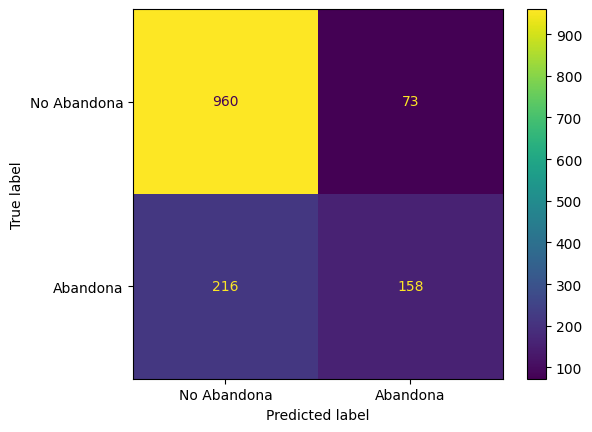

In [379]:
visializacion = ConfusionMatrixDisplay(confusion_matrix=matrix_conf, display_labels=['No Abandona', 'Abandona'])
visializacion.plot();

<b>El modelo no esta generalizando bien, hay 216 falsos positivos, lo cúal puede ser una perdida de clientes  la empresa, se ajustara el modelo ya segun sea necesario

In [380]:
from sklearn.metrics import classification_report

In [381]:
print(classification_report(y_test, y_previsto))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1033
           1       0.68      0.42      0.52       374

    accuracy                           0.79      1407
   macro avg       0.75      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407



## Validación crusada Kfold

In [382]:
from sklearn.model_selection import StratifiedKFold, cross_validate

In [383]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [384]:
cv_resultado = cross_validate(modelo_rf, X, y, cv=skf, scoring='recall')
cv_resultado

{'fit_time': array([0.78187251, 0.75976086, 0.78718758, 0.82799554, 0.79963803]),
 'score_time': array([0.0392859 , 0.03743219, 0.04084182, 0.03736639, 0.03740025]),
 'test_score': array([0.43315508, 0.45721925, 0.40214477, 0.42513369, 0.44652406])}

<b>Estos son los resuldados de recall y desempeño del modelo seleccionado, a continuación se hara el balaceo de los datos y modelo y se testeara de nuevo, ya que su desempeño dentro de todo no esta en número criticos

#Balaceo de los datos

##Pruebas

###OverSampling

In [385]:
from imblearn.over_sampling import SMOTE

In [386]:
from imblearn.pipeline import Pipeline as imbpipeline

In [387]:
pipeline = imbpipeline([('oversample', SMOTE()), ('modelo_rf', modelo_rf)])
cv_resultado = cross_validate(pipeline, X, y, cv=skf, scoring='recall')
cv_resultado

{'fit_time': array([1.85979152, 1.74321103, 1.40327859, 1.40185046, 1.38456631]),
 'score_time': array([0.05020308, 0.03777552, 0.03797317, 0.05194259, 0.0394721 ]),
 'test_score': array([0.69518717, 0.70053476, 0.71849866, 0.67914439, 0.70588235])}

###Under sampling

In [388]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss

In [389]:
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('modelo_rf', modelo_rf)])
cv_resultado = cross_validate(pipeline, X, y, cv=skf, scoring='recall')
cv_resultado

{'fit_time': array([0.65625644, 0.61614347, 0.63871217, 0.62105393, 0.61014056]),
 'score_time': array([0.04151797, 0.04072189, 0.04083967, 0.05268359, 0.03734159]),
 'test_score': array([0.72727273, 0.70588235, 0.6997319 , 0.72994652, 0.73529412])}

In [390]:
pipeline = imbpipeline([('undersample', RandomUnderSampler()), ('modelo_rf', modelo_rf)])
cv_resultado = cross_validate(pipeline, X, y, cv=skf, scoring='recall')
cv_resultado

{'fit_time': array([0.56840634, 0.54077816, 0.67485595, 0.81619525, 0.82086539]),
 'score_time': array([0.04128695, 0.04402828, 0.05337787, 0.04994798, 0.05721903]),
 'test_score': array([0.81016043, 0.80748663, 0.82573727, 0.77272727, 0.82887701])}

###Prueba Sin balanceo, pero con ajuste en modelo

In [391]:
modelo_rf = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=5, class_weight='balanced')
modelo_rf.fit(X_train, y_train)
y_previsto = modelo_rf.predict(X_test)

modelo_rf.score(X_test, y_test)
print(classification_report(y_test, y_previsto))
cv_resultado = cross_validate(modelo_rf, X, y, cv=skf, scoring='recall')
cv_resultado

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1033
           1       0.51      0.80      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.75      1407



{'fit_time': array([0.78436947, 0.79635119, 0.77064013, 0.83322883, 0.81997824]),
 'score_time': array([0.04027867, 0.04055452, 0.03856158, 0.03857112, 0.03734064]),
 'test_score': array([0.80481283, 0.81283422, 0.8150134 , 0.77540107, 0.81818182])}

###Prueba con ambos tipos de ajuste

In [392]:
pipeline = imbpipeline([('undersample', RandomUnderSampler()), ('modelo_rf', modelo_rf)])
cv_resultado = cross_validate(pipeline, X, y, cv=skf, scoring='recall')
cv_resultado

{'fit_time': array([0.55246592, 0.55888605, 0.53972793, 0.56020164, 0.54892874]),
 'score_time': array([0.03796721, 0.04455519, 0.03965425, 0.04019785, 0.04328918]),
 'test_score': array([0.81283422, 0.81818182, 0.82037534, 0.80213904, 0.8368984 ])}

###Prueba eliminando redundantes

In [393]:
columnas_redundantes = [
    'onehotencoder__StreamingTV_No internet service',
    'onehotencoder__TechSupport_No internet service',
    'onehotencoder__DeviceProtection_No internet service',
    'onehotencoder__OnlineBackup_No internet service',
    'onehotencoder__OnlineSecurity_No internet service',
    'onehotencoder__StreamingMovies_No internet service'
]
X_train_p = pd.DataFrame(X_train, columns=one_hot.get_feature_names_out(columnas)).drop(columns=columnas_redundantes, errors='ignore')
X_test_p = pd.DataFrame(X_test, columns=one_hot.get_feature_names_out(columnas)).drop(columns=columnas_redundantes, errors='ignore')

In [394]:
modelo_rf_p = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=5, class_weight='balanced')
modelo_rf_p.fit(X_train_p, y_train)
y_previsto_p = modelo_rf_p.predict(X_test_p)

modelo_rf_p.score(X_test_p, y_test)
print(classification_report(y_test, y_previsto))
cv_resultado = cross_validate(modelo_rf_p, X, y, cv=skf, scoring='recall')
cv_resultado

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1033
           1       0.51      0.80      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.75      1407



{'fit_time': array([0.79933977, 0.91641545, 1.17094302, 1.15930557, 0.78383374]),
 'score_time': array([0.03712583, 0.05076528, 0.05028009, 0.03690863, 0.04074979]),
 'test_score': array([0.80481283, 0.81283422, 0.8150134 , 0.77540107, 0.81818182])}

In [395]:
modelo_rf_p = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=5, class_weight='balanced')
modelo_rf_p.fit(X_train_p, y_train)
y_previsto_p = modelo_rf_p.predict(X_test_p)

modelo_rf_p.score(X_test_p, y_test)
print(classification_report(y_test, y_previsto))

pipeline = imbpipeline([('undersample', RandomUnderSampler()), ('modelo_rf', modelo_rf_p)])

cv_resultado = cross_validate(modelo_rf_p, X, y, cv=skf, scoring='recall')
cv_resultado

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1033
           1       0.51      0.80      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.75      1407



{'fit_time': array([0.79078698, 0.78571129, 0.76820827, 0.83182621, 0.79102468]),
 'score_time': array([0.03830504, 0.03905368, 0.03921247, 0.03766084, 0.03842926]),
 'test_score': array([0.80481283, 0.81283422, 0.8150134 , 0.77540107, 0.81818182])}

##Balanceo de los definitivo

###Eliminar columnas redundantes

In [396]:
'''def limpiar_columnas(X_1):
  columnas_redundantes = [
    'onehotencoder__StreamingTV_No internet service',
    'onehotencoder__TechSupport_No internet service',
    'onehotencoder__DeviceProtection_No internet service',
    'onehotencoder__OnlineBackup_No internet service',
    'onehotencoder__OnlineSecurity_No internet service',
    'onehotencoder__StreamingMovies_No internet service'
    ]
  X_1 = pd.DataFrame(X_1, columns=one_hot.get_feature_names_out(columnas))
  return  X_1.drop(columns=columnas_redundantes, errors='ignore')'''


"def limpiar_columnas(X_1):\n  columnas_redundantes = [\n    'onehotencoder__StreamingTV_No internet service',\n    'onehotencoder__TechSupport_No internet service',\n    'onehotencoder__DeviceProtection_No internet service',\n    'onehotencoder__OnlineBackup_No internet service',\n    'onehotencoder__OnlineSecurity_No internet service',\n    'onehotencoder__StreamingMovies_No internet service'\n    ]\n  X_1 = pd.DataFrame(X_1, columns=one_hot.get_feature_names_out(columnas))\n  return  X_1.drop(columns=columnas_redundantes, errors='ignore')"

In [397]:
'''X_train = limpiar_columnas(X_train)
X_test = limpiar_columnas(X_test)'''

'X_train = limpiar_columnas(X_train)\nX_test = limpiar_columnas(X_test)'

In [398]:
under_sampling = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampling.fit_resample(X_train, y_train)

In [399]:
upper = SMOTE(random_state=42)
X_train_upper, y_train_upper = upper.fit_resample(X_train, y_train)

In [400]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smote_enn.fit_resample(X_train, y_train)

In [401]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_train_smotetomek, y_train_smotetomek = smote_tomek.fit_resample(X_train, y_train)

#Modelo definitivo antes de ajustes

In [402]:
modelo_rf = RandomForestClassifier(max_depth=5, n_estimators=1200, min_samples_leaf=5, class_weight='balanced')
modelo_rf.fit(X_train_upper, y_train_upper)
y_previsto = modelo_rf.predict(X_test)

print(modelo_rf.score(X_test, y_test))
print(classification_report(y_test, y_previsto))

0.7661691542288557
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1033
           1       0.55      0.71      0.62       374

    accuracy                           0.77      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.79      0.77      0.77      1407



In [403]:
matrix_conf = confusion_matrix(y_test, y_previsto)
print(matrix_conf)

[[812 221]
 [108 266]]


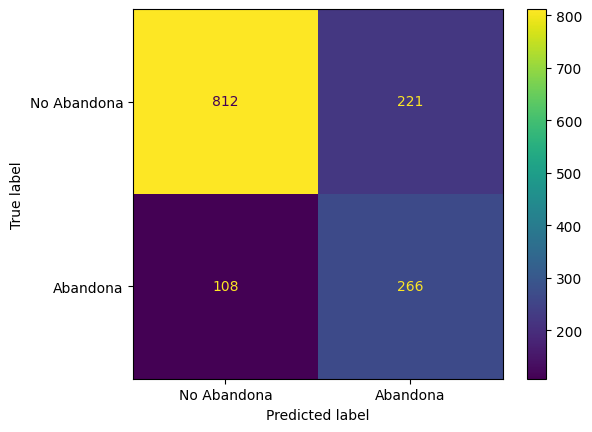

In [404]:
visializacion = ConfusionMatrixDisplay(confusion_matrix=matrix_conf, display_labels=['No Abandona', 'Abandona'])
visializacion.plot();

#Pruebas

In [405]:
datos_ejemplo = pd.read_csv('/content/ejemplos_churn.csv')
datos_ejemplo

,onehotencoder__gender_Male,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,...,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Churn
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0,4,73.9,280.85,1
1,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1,13,98.0,1237.85,1
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1,3,83.9,267.40,1
3,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0,9,65.6,593.30,0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0,9,59.9,542.40,0
5,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0,9,69.4,571.45,0


In [406]:
X_real = datos_ejemplo.drop(columns=['Churn'], axis=1)
y_real = datos_ejemplo['Churn']

In [407]:
#X_real = limpiar_columnas(X_real)

In [408]:
y_predit_real = modelo_rf.predict(X_real)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [409]:
print(modelo_rf.score(X_real, y_real))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.8333333333333334


In [429]:
print(r2_score(y_real, y_predit_real))

0.33333333333333337


In [410]:
print(classification_report(y_real, y_predit_real))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



In [411]:
matrix_conf = confusion_matrix(y_real, y_predit_real)
print(matrix_conf)

[[2 1]
 [0 3]]


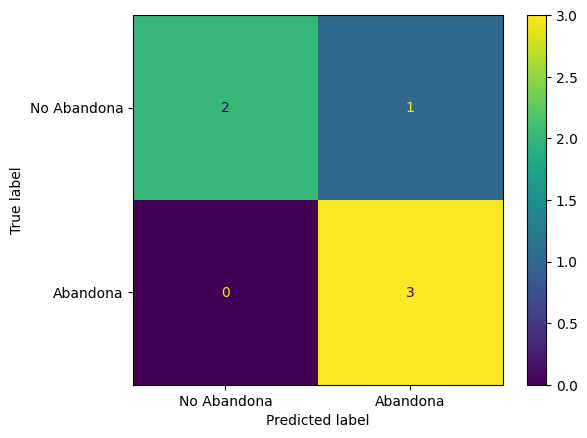

In [412]:
visializacion = ConfusionMatrixDisplay(confusion_matrix=matrix_conf, display_labels=['No Abandona', 'Abandona'])
visializacion.plot();

##Testeo de la importancia de las features

In [413]:
len(datos_procesados.columns)

41

In [414]:
importances = modelo_rf.feature_importances_

In [423]:
feature_importtances = pd.DataFrame({'Features':one_hot.get_feature_names_out(columnas), 'Importances': (importances*100).round(2)}).sort_values('Importances', ascending=False)
feature_importtances

,Features,Importances
28,onehotencoder__Contract_Month-to-month,17.43
10,onehotencoder__OnlineSecurity_No,12.79
19,onehotencoder__TechSupport_No,11.48
34,onehotencoder__PaymentMethod_Electronic check,10.11
37,remainder__tenure,4.69
13,onehotencoder__OnlineBackup_No,4.59
30,onehotencoder__Contract_Two year,4.49
16,onehotencoder__DeviceProtection_No,4.08
8,onehotencoder__InternetService_Fiber optic,3.89
12,onehotencoder__OnlineSecurity_Yes,3.58


In [432]:
param_grid = {
    'n_estimators': [100, 300, 450],
    'max_depth': [5, 15, 25],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 5, 10],
    'max_leaf_nodes': [2, 5, 8]
}

In [433]:
from sklearn.model_selection import GridSearchCV

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=cv, scoring='r2')

grid_search.fit(X_train_upper, y_train_upper)



GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 15, 25], 'max_leaf_nodes': [2, 5, 8],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 450]},
             scoring='r2')

In [434]:
grid_search.best_params_

{'max_depth': 15,
 'max_leaf_nodes': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

#Modelo definitivo con ajustes

In [435]:
modelo_rf = RandomForestClassifier(max_depth=15, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=2, n_estimators=300, class_weight='balanced')
modelo_rf.fit(X_train_upper, y_train_upper)

y_previsto = modelo_rf.predict(X_test)

print(modelo_rf.score(X_test, y_test))
print(classification_report(y_test, y_previsto))

0.767590618336887
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1033
           1       0.55      0.68      0.61       374

    accuracy                           0.77      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.79      0.77      0.77      1407



In [ ]:
import pickle

In [ ]:
with open('modelo_rf.pkl', 'wb') as archivo:
    pickle.dump(modelo_rf, archivo)

In [436]:
y_predit_real = modelo_rf.predict(X_real)

print(modelo_rf.score(X_real, y_real))
print(classification_report(y_real, y_predit_real))

0.8333333333333334
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [437]:
matrix_conf = confusion_matrix(y_real, y_predit_real)
print(matrix_conf)

[[2 1]
 [0 3]]


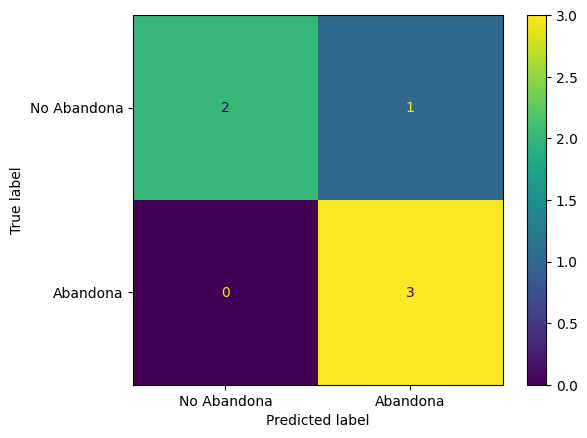

In [438]:
visializacion = ConfusionMatrixDisplay(confusion_matrix=matrix_conf, display_labels=['No Abandona', 'Abandona'])
visializacion.plot();

#Interpretación y conclusiones